<a href="https://colab.research.google.com/github/bouattara/Data-Science-Projects/blob/main/Used_car_price_prediction_Using_LinearRegression%2C_DecisionTree%2C_RandomForest%2C_and_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

# TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:


!pip install xgboost

In [ ]:
!pip install wordcloud

In [ ]:
!pip install plotly
!pip install jupyterthemes

In [ ]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Interactive Data Visualization
from jupyterthemes import jtplot # Jupyter Notebook Theme
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.


In [ ]:
# Read the CSV file
data = pd.read_csv('cars_data.csv')


In [ ]:
# Load the top 10 instances
data.head()

Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197

In [ ]:
# Load the bottom 10 instances
data.tail(10)

Make                    Model   Type  Origin DriveTrain     MSRP  \
418  Volvo              S60 2.5 4dr  Sedan  Europe        All  $31,745   
419  Volvo               S60 T5 4dr  Sedan  Europe      Front  $34,845   
420  Volvo                S60 R 4dr  Sedan  Europe        All  $37,560   
421  Volvo              S80 2.9 4dr  Sedan  Europe      Front  $37,730   
422  Volvo             S80 2.5T 4dr  Sedan  Europe        All  $37,885   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
418  $29,916         2.5        5.0         208        20           27   
419  $32,902         2.3        5.0         247        20           28   
420  $35,382         2.5        5.0         300        18           25   
421  $35,542         2.9        6.0         208        20           28   
422  $35,688         2.5        5.0         194        20           27   
423  $38,203         2.4        5.0         197        21           28   
424  $40,083         2.3        5.0         242        20           26   
425  $42,573         2.9        6.0         268        19           26   
426  $24,641         1.9        4.0         170        22           29   
427  $33,112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  
418    3903        107     180  
419    3766        107     180  
420    3571        107     181  
421    3576        110     190  
422    3691        110     190  
423    3450        105     186  
424    3450        105     186  
425    3653        110     190  
426    2822        101     180  
427    3823        109     186

In [ ]:
# Display the feature columns
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [ ]:
# Check the shape of the dataframe
data.shape

(428, 15)

In [ ]:
# Check if any missing values are present in the dataframe
data.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [ ]:
data= data.dropna()

In [ ]:
# Obtain the summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


In [ ]:
# Convert MSRP and Invoice datatype to integer so we need to remove $ sign and comma (,) from these 2 columns


In [ ]:
data["MSRP"]=data["MSRP"].str.replace("$", "")
data["MSRP"]=data["MSRP"].str.replace(",", "")
data["MSRP"]=data["MSRP"].astype(int)

<ipython-input-235-bcbb38b7111d>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



MINI CHALLENGE #1:
- Repeat the same procedure for the invoice column

In [ ]:
data["Invoice"] = data["Invoice"].str.replace("$", "")
data["Invoice"] = data["Invoice"].str.replace(",", "")
data["Invoice"] = data["Invoice"].astype(int)

<ipython-input-236-82026e648a5a>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
data.Invoice = data.Invoice.astype(int)

In [ ]:
# Let's view the updated MSRP and Invoice Columns
data.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [ ]:
# Display the updated summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int64  
 6   Invoice      426 non-null    int64  
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 53.2+ KB


MINI CHALLENGE #2:

- What is the maximum price of the used car?
- What is the minimum price of the used car?

In [ ]:
data.describe()

MSRP        Invoice  EngineSize   Cylinders  Horsepower  \
count     426.000000     426.000000  426.000000  426.000000  426.000000   
mean    32804.549296   30040.654930    3.205634    5.807512  215.877934   
std     19472.460825   17679.430122    1.103520    1.558443   71.991040   
min     10280.000000    9875.000000    1.400000    3.000000   73.000000   
25%     20324.750000   18836.000000    2.400000    4.000000  165.000000   
50%     27807.500000   25521.500000    3.000000    6.000000  210.000000   
75%     39225.000000   35754.750000    3.900000    6.000000  255.000000   
max    192465.000000  173560.000000    8.300000   12.000000  500.000000   

         MPG_City  MPG_Highway       Weight   Wheelbase      Length  
count  426.000000   426.000000   426.000000  426.000000  426.000000  
mean    20.070423    26.854460  3580.474178  108.164319  186.420188  
std      5.248616     5.752335   759.870073    8.330030   14.366611  
min     10.000000    12.000000  1850.000000   89.000000  143.000000  
25%     17.000000    24.000000  3111.250000  103.000000  178.000000  
50%     19.000000    26.000000  3476.000000  107.000000  187.000000  
75%     21.750000    29.000000  3979.250000  112.000000  194.000000  
max     60.000000    66.000000  7190.000000  144.000000  238.000000

In [ ]:
print(data['MSRP'].max())
print(data.MSRP.min())

192465
10280


# TASK #3: PERFORM DATA VISUALIZATION - PART #1

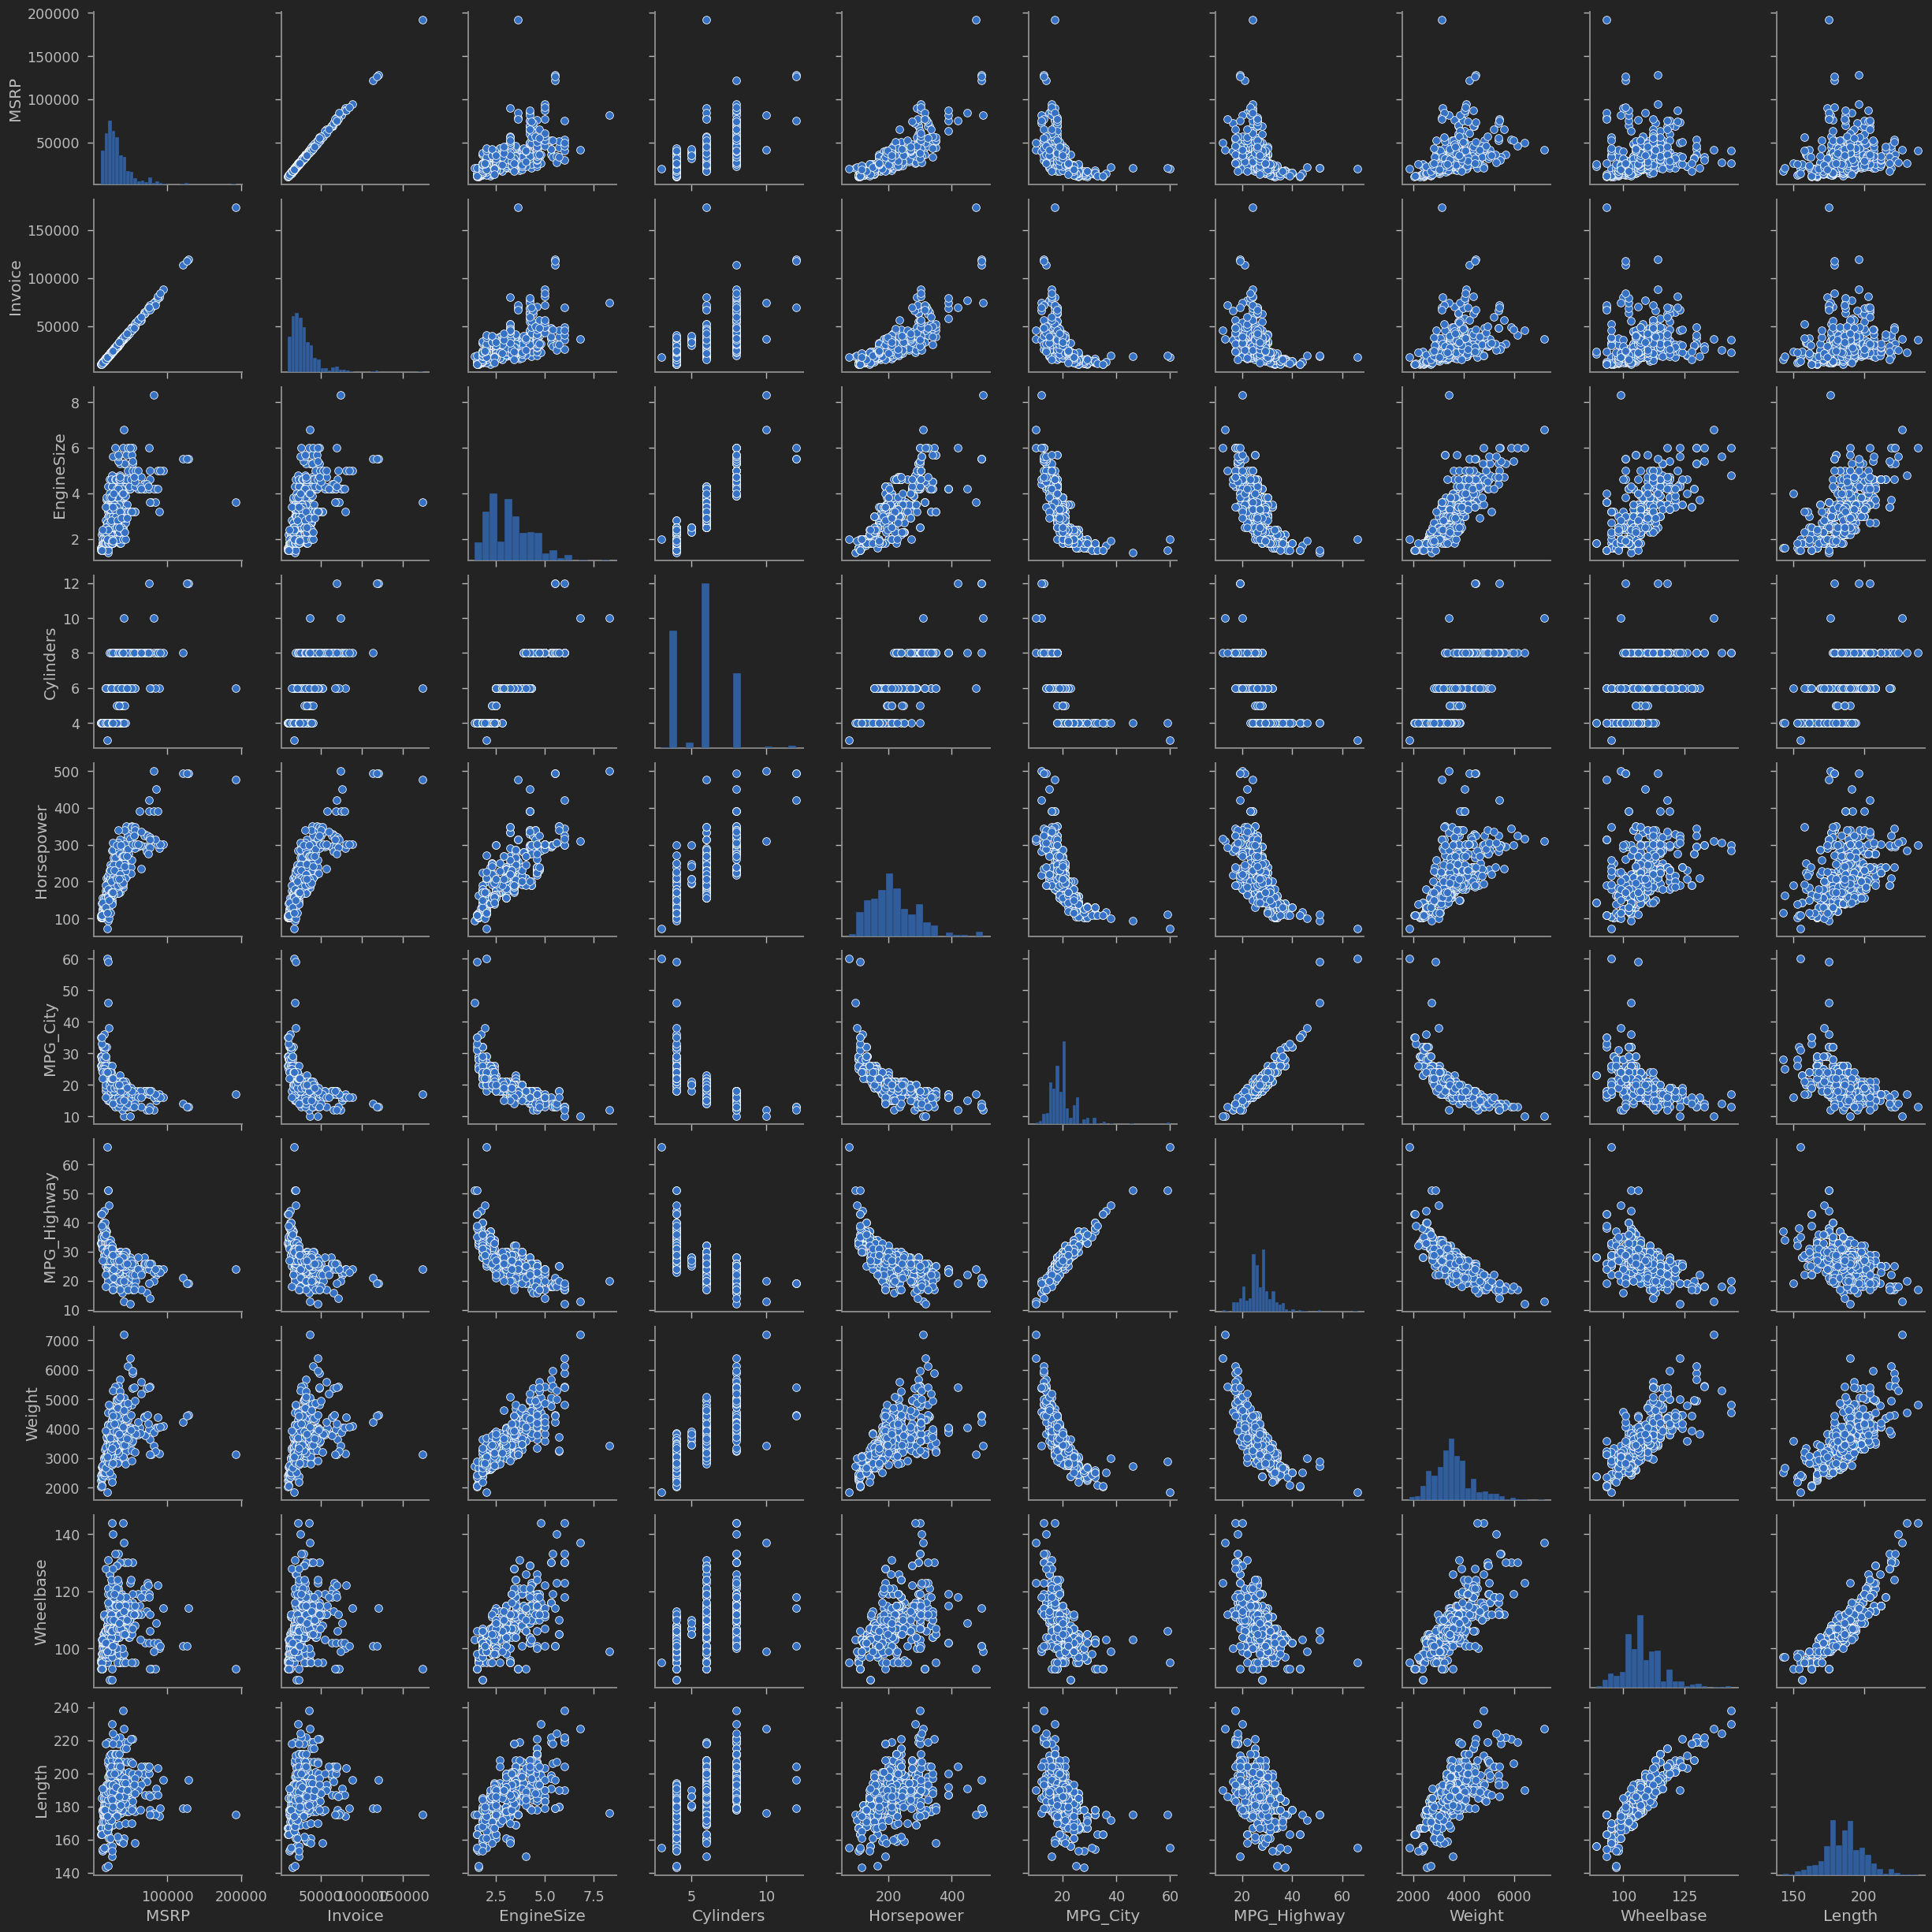

In [ ]:
# scatterplots for joint relationships and histograms for univariate distributions
sns.pairplot(data=data)


In [ ]:
# Let's view various makes of the cars
data.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [ ]:
fig = px.histogram(data, x="Make",
                   labels={"Make":"Manufacturer"},
                   title = "Make of The Car",
                    color_discrete_sequence = ["maroon"])

fig.show()

Text(0.5, 1.0, 'Make of The Car')

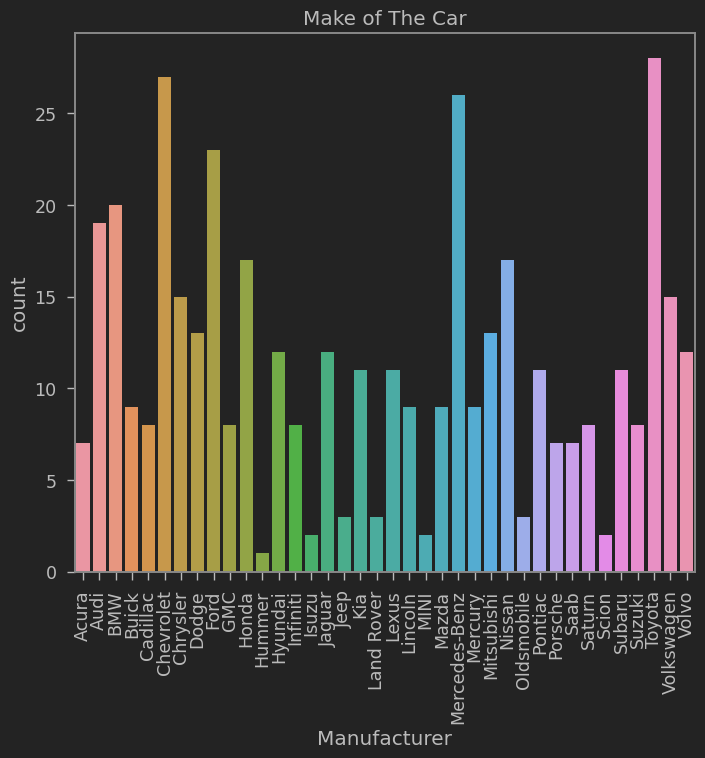

In [ ]:
sns.countplot(data=data, x="Make")
plt.xticks(rotation=90)
plt.xlabel("Manufacturer")
plt.title("Make of The Car")

In [ ]:
# Let's view various types of the cars
data.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [ ]:
fig = px.histogram(data, x="Type",
                   labels={"Type": "Type"},
                   title="Type of Car",
                   color_discrete_sequence =["maroon"])

fig.show()

Text(0.5, 1.0, 'Type of Car')

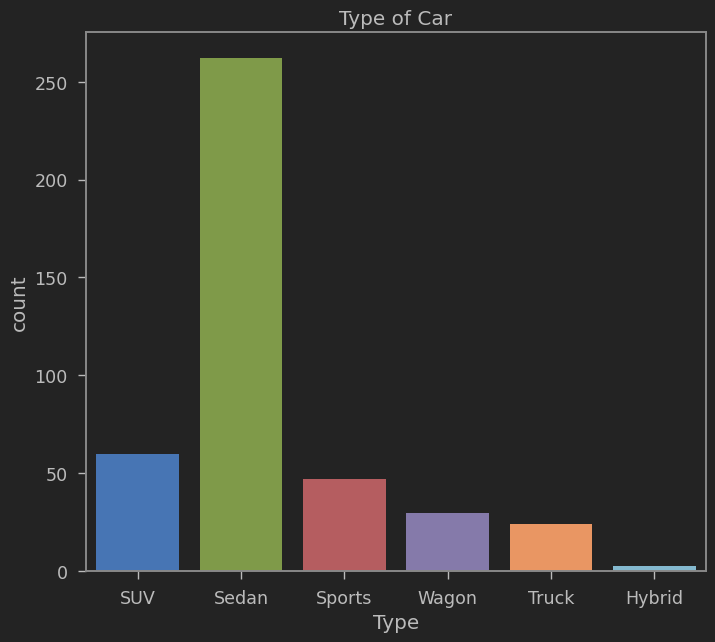

In [ ]:
sns.countplot(data, x="Type")
plt.title("Type of Car")


In [ ]:
# Let's plot the location
data.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [ ]:
fig = px.histogram(data, x="Origin",
                   labels = {"Origin": "Location"},
                   title = "Location of Car",
                   color_discrete_sequence = ["blue"])

fig.show()

In [ ]:
# Let's view the drivetrain of the cars
data.DriveTrain.unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [ ]:
fig = px.histogram(data, x = "DriveTrain",
                  labels = {"DriveTrain":"Drivetrain"},
                  title = "DRIVETRAIN OF THE CAR",
                  color_discrete_sequence = ["BLACK"])

fig.show()

In [ ]:
# Plot the make of the car and its location
fig = px.histogram(data, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")

fig.show()

MINI CHALLENGE #3:

- Plot the plotly histogram of Make and Type of the car
- Find out which manufacturer has high number of Sports type
- Find out which manufacturers has Hybrid

In [ ]:
fig = px.histogram(data, x="Make",
                   color = "Type",
                   labels = {"Make": "Manufacturer"},
                    title = "Make vs Type")
fig.show()

# TASK #4: PERFORM DATA VISUALIZATION - PART #2

In [ ]:
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS

In [ ]:
data.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [ ]:
text = data.Model.values
text

array(['MDX', 'RSX Type S 2dr', 'TSX 4dr', 'TL 4dr', '3.5 RL 4dr',
       '3.5 RL w/Navigation 4dr', 'NSX coupe 2dr manual S', 'A4 1.8T 4dr',
       'A41.8T convertible 2dr', 'A4 3.0 4dr',
       'A4 3.0 Quattro 4dr manual', 'A4 3.0 Quattro 4dr auto',
       'A6 3.0 4dr', 'A6 3.0 Quattro 4dr', 'A4 3.0 convertible 2dr',
       'A4 3.0 Quattro convertible 2dr', 'A6 2.7 Turbo Quattro 4dr',
       'A6 4.2 Quattro 4dr', 'A8 L Quattro 4dr', 'S4 Quattro 4dr',
       'RS 6 4dr', 'TT 1.8 convertible 2dr (coupe)',
       'TT 1.8 Quattro 2dr (convertible)',
       'TT 3.2 coupe 2dr (convertible)', 'A6 3.0 Avant Quattro',
       'S4 Avant Quattro', 'X3 3.0i', 'X5 4.4i', '325i 4dr', '325Ci 2dr',
       '325Ci convertible 2dr', '325xi 4dr', '330i 4dr', '330Ci 2dr',
       '330xi 4dr', '525i 4dr', '330Ci convertible 2dr', '530i 4dr',
       '545iA 4dr', '745i 4dr', '745Li 4dr', 'M3 coupe 2dr',
       'M3 convertible 2dr', 'Z4 convertible 2.5i 2dr',
       'Z4 convertible 3.0i 2dr', '325xi Sport', 'Ra

In [ ]:
#stopwords let you visualize which words are the most common in the text data
stopwords = set(STOPWORDS)

In [ ]:
   wc = WordCloud(background_color="black", max_words= 2000, max_font_size=100, random_state=3,
                  stopwords=stopwords, contour_width = 3).generate(str(text))

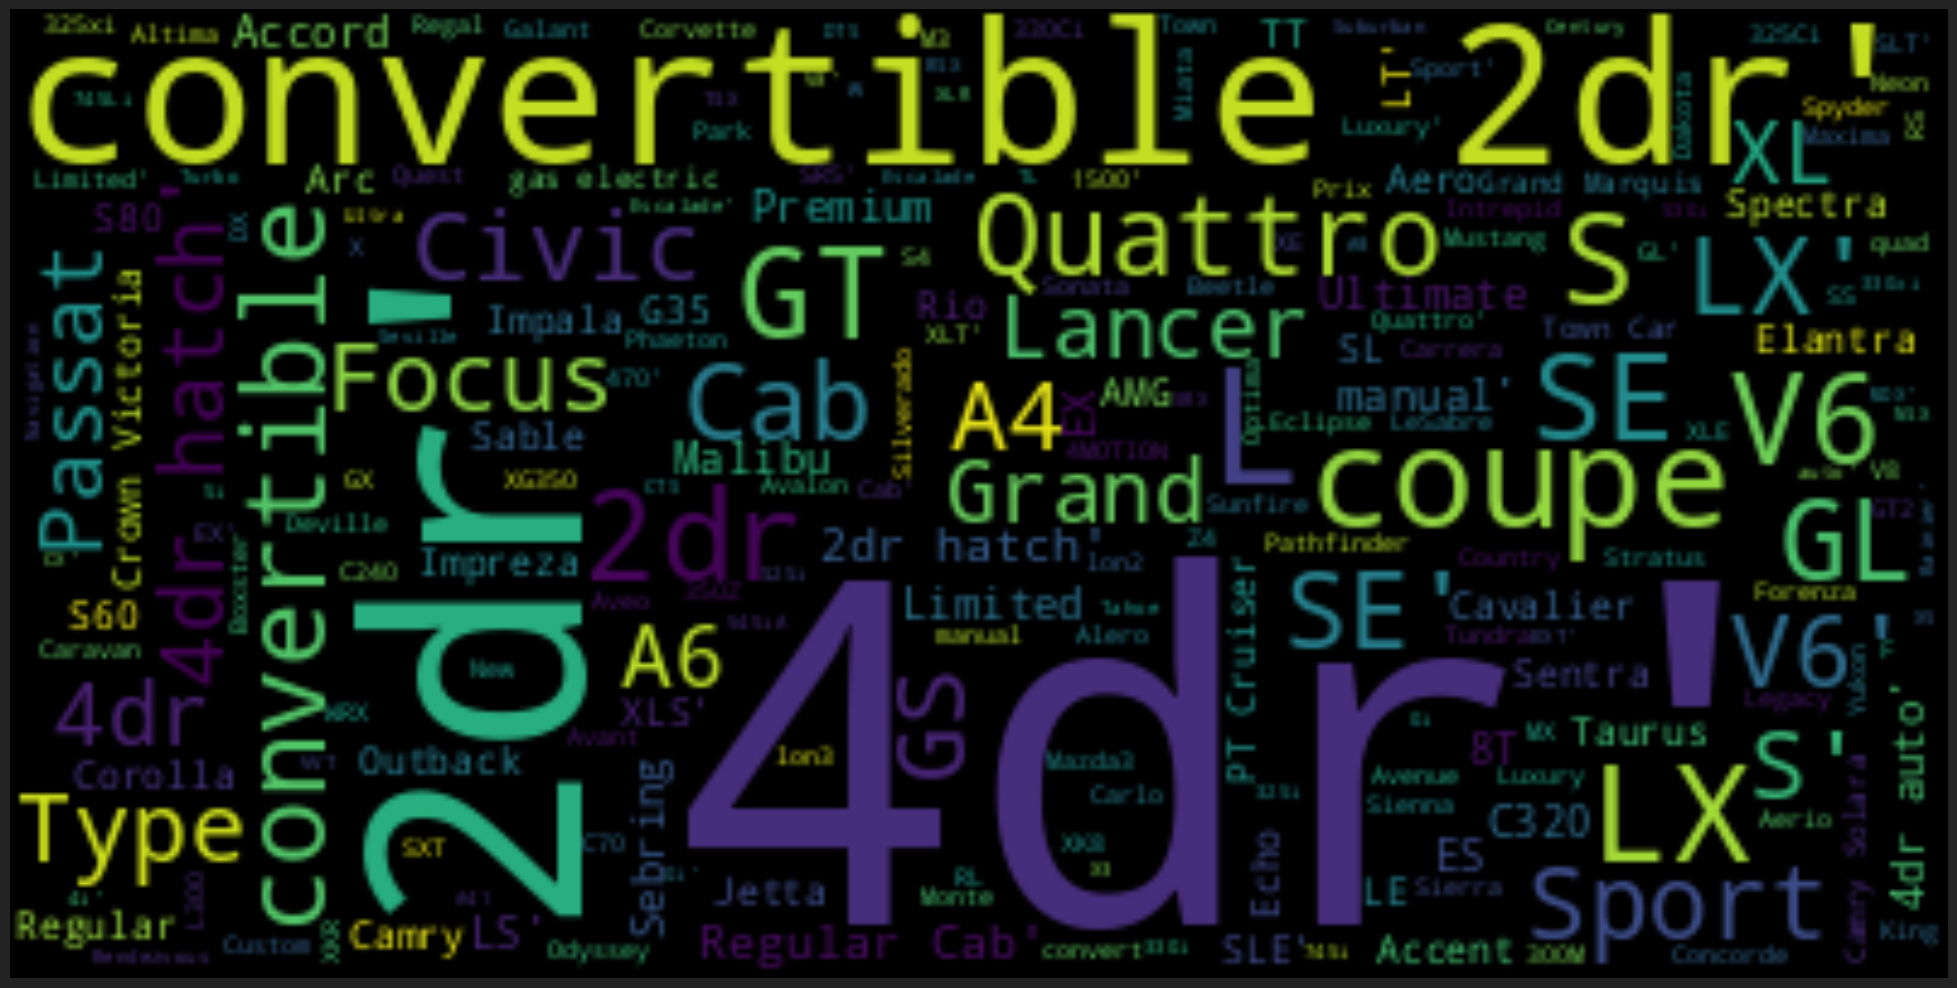

In [ ]:
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Obtain the correlation matrix
data.corr()

<ipython-input-261-26f9c08e6ea8>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000  0.999132    0.573238   0.649742    0.827296 -0.475916   
Invoice      0.999132  1.000000    0.566019   0.645226    0.824079 -0.471304   
EngineSize   0.573238  0.566019    1.000000   0.908002    0.793250 -0.717860   
Cylinders    0.649742  0.645226    0.908002   1.000000    0.810341 -0.684402   
Horsepower   0.827296  0.824079    0.793250   0.810341    1.000000 -0.677034   
MPG_City    -0.475916 -0.471304   -0.717860  -0.684402   -0.677034  1.000000   
MPG_Highway -0.440523 -0.435452   -0.725901  -0.676100   -0.647425  0.940993   
Weight       0.447987  0.441916    0.808707   0.742209    0.631758 -0.740418   
Wheelbase    0.151665  0.148003    0.638947   0.546730    0.387561 -0.508029   
Length       0.171060  0.165645    0.636015   0.547783    0.382386 -0.504184   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.440523  0.447987   0.151665  0.171060  
Invoice        -0.435452  0.441916   0.148003  0.165645  
EngineSize     -0.725901  0.808707   0.638947  0.636015  
Cylinders      -0.676100  0.742209   0.546730  0.547783  
Horsepower     -0.647425  0.631758   0.387561  0.382386  
MPG_City        0.940993 -0.740418  -0.508029 -0.504184  
MPG_Highway     1.000000 -0.793615  -0.525457 -0.468756  
Weight         -0.793615  1.000000   0.760857  0.689168  
Wheelbase      -0.525457  0.760857   1.000000  0.889838  
Length         -0.468756  0.689168   0.889838  1.000000

<ipython-input-262-b699050ce883>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

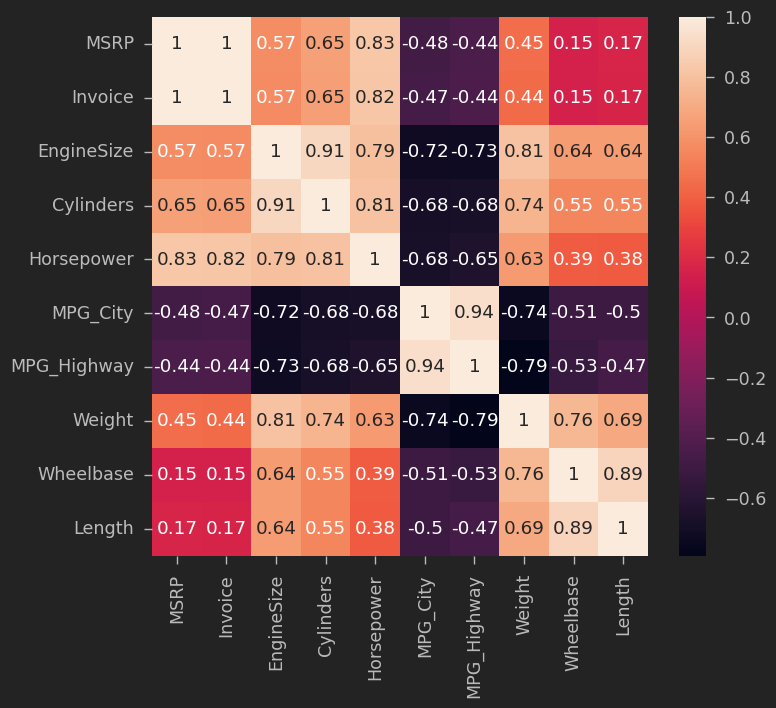

In [ ]:
sns.heatmap(data.corr(), annot=True)

MINI CHALLENGE #4:
- Comment on the correlation matrix, which feature has the highest positive correlation with MSRP?

# TASK #5: PREPARE THE DATA BEFORE MODEL TRAINING

In [ ]:
data.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [ ]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"


In [ ]:
data_dummy = pd.get_dummies(data, columns= ["Make", "Model", "Type", "Origin", "DriveTrain"])

In [ ]:
data_dummy

MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0    36945    33337         3.5        6.0         265        17           23   
1    23820    21761         2.0        4.0         200        24           31   
2    26990    24647         2.4        4.0         200        22           29   
3    33195    30299         3.2        6.0         270        20           28   
4    43755    39014         3.5        6.0         225        18           24   
..     ...      ...         ...        ...         ...       ...          ...   
423  40565    38203         2.4        5.0         197        21           28   
424  42565    40083         2.3        5.0         242        20           26   
425  45210    42573         2.9        6.0         268        19           26   
426  26135    24641         1.9        4.0         170        22           29   
427  35145    33112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  ...  Type_Sedan  Type_Sports  Type_Truck  \
0      4451        106     189  ...           0            0           0   
1      2778        101     172  ...           1            0           0   
2      3230        105     183  ...           1            0           0   
3      3575        108     186  ...           1            0           0   
4      3880        115     197  ...           1            0           0   
..      ...        ...     ...  ...         ...          ...         ...   
423    3450        105     186  ...           1            0           0   
424    3450        105     186  ...           1            0           0   
425    3653        110     190  ...           1            0           0   
426    2822        101     180  ...           0            0           0   
427    3823        109     186  ...           0            0           0   

     Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0             0            1              0           0               1   
1             0            1              0           0               0   
2             0            1              0           0               0   
3             0            1              0           0               0   
4             0            1              0           0               0   
..          ...          ...            ...         ...             ...   
423           0            0              1           0               0   
424           0            0              1           0               0   
425           0            0              1           0               0   
426           1            0              1           0               0   
427           1            0              1           0               1   

     DriveTrain_Front  DriveTrain_Rear  
0                   0                0  
1                   1                0  
2                   1                0  
3                   1                0  
4                   1                0  
..                ...              ...  
423                 1                0  
424                 1                0  
425                 1                0  
426                 1                0  
427                 0                0  

[426 rows x 483 columns]

In [ ]:
# Invoice feature does not contribute to car price prediction, so we will drop Invoice feature

In [ ]:
data = data_dummy.drop(["Invoice"], axis=1)

In [ ]:
data.shape

(426, 482)

In [ ]:
# Feeding input features to X and output (MSRP) to y
Y = data["MSRP"]
X = data.drop(["MSRP"], axis=1)


Creating Numpy Arrays of X and Y

In [ ]:
X = np.array(X)
Y = np.array(Y)


Dividing data into train, test, with test=20%, train=80%

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)

MINI CHALLENGE #5:

- Verify that the split was successful

In [ ]:
X_Train.shape

(340, 481)

In [ ]:
X_Test.shape

(86, 481)

In [ ]:
Y_Train.shape

(340,)

In [ ]:
Y_Test.shape

(86,)

# TASK #5: TRAIN AND EVALUATE A MULTIPLE LINEAR REGRESSION

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [ ]:
LinearRegression_Model = LinearRegression()
LinearRegression_Model.fit(X_Train, Y_Train)

LinearRegression()

In [ ]:
accuracy_LinearRegression = LinearRegression_Model.score(X_Test, Y_Test)
accuracy_LinearRegression

0.7683667548064084

# TASK #6: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
# Photo Credits:
# https://creazilla.com/nodes/22202-giraffe-clipart
# https://pixy.org/4569488/
# https://pixabay.com/illustrations/monkey-animal-gorilla-zoo-nature-4187960/
# https://creazilla.com/nodes/15581-running-tiger-clipart

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_Train, Y_Train)

DecisionTreeRegressor()

In [ ]:
accuracy_DecisionTree = DecisionTree_model.score(X_Test, Y_Test)
accuracy_DecisionTree

0.7650041120737429

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RandomForest_model = RandomForestRegressor(n_estimators =5, max_depth=5)
RandomForest_model.fit(X_Train, Y_Train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [ ]:
accuracy_RandomForest= RandomForest_model.score(X_Test, Y_Test)
accuracy_RandomForest

0.8092286723470083

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHING XG-BOOST ALGORITHM

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

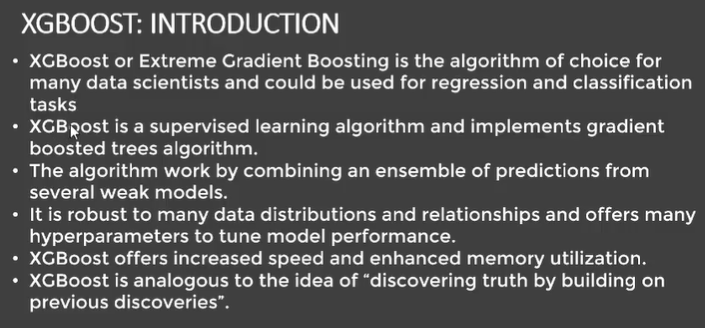

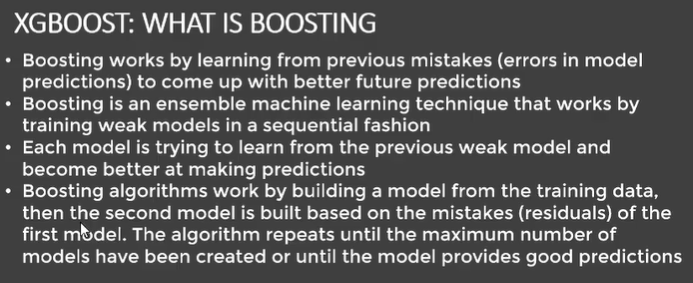

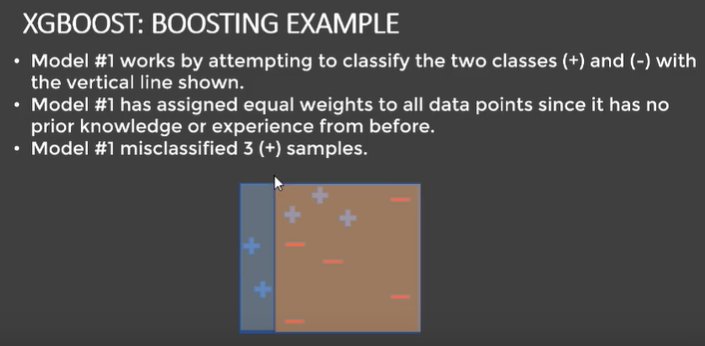

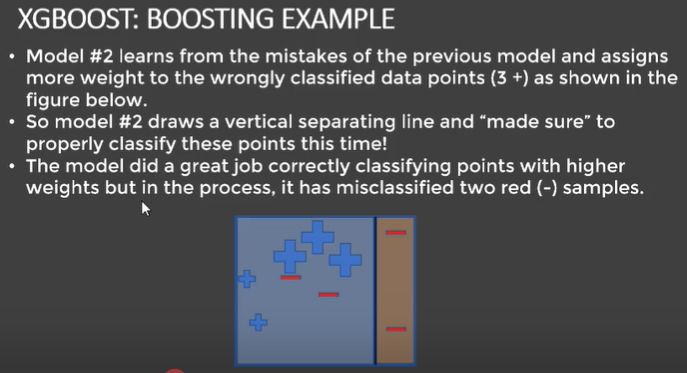

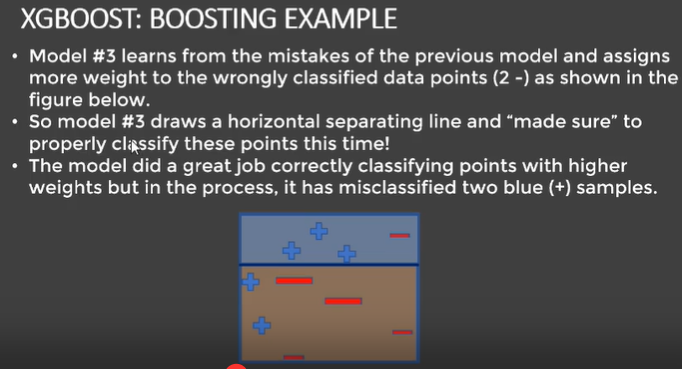

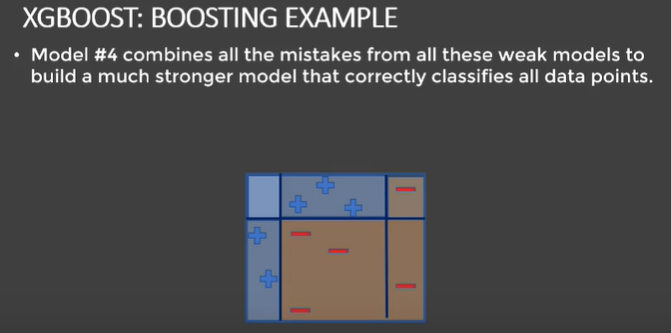

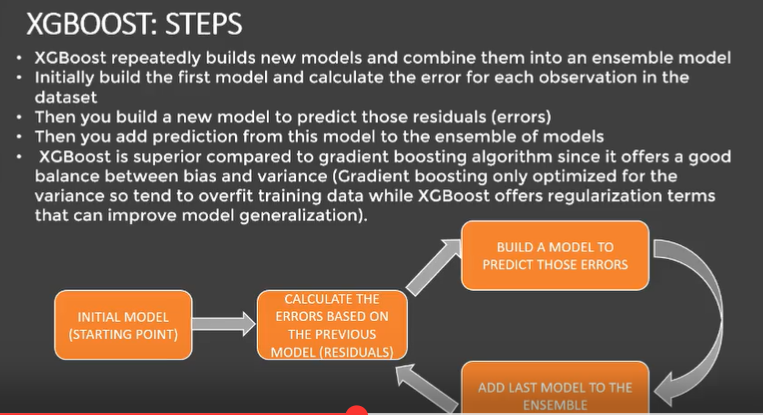

# TASK #8: TRAIN AN XG-BOOST REGRESSOR MODEL

In [ ]:
from xgboost import XGBRegressor

In [ ]:
XGBoost_model = XGBRegressor()
XGBoost_model.fit(X_Train, Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
accuracy_XGBoost = XGBoost_model.score(X_Test, Y_Test)
accuracy_XGBoost

0.860350722953602

MINI CHALLENGE #6:

- Which regressor performed best?

# TASK #9: COMPARE MODELS AND CALCULATE REGRESSION KPIs

[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of Used Cars ($)'),
 Text(0, 0.5, 'Actual Price of Used Cars')]

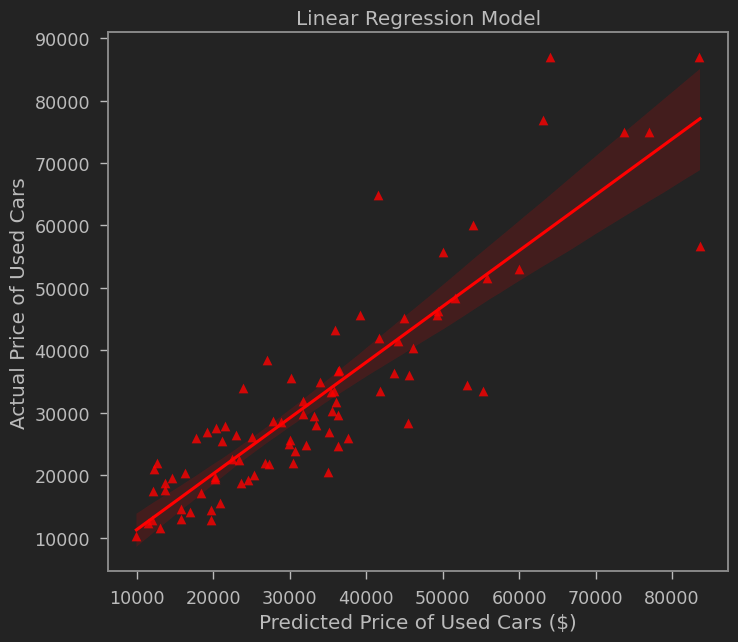

In [ ]:
Y_predict_linear = LinearRegression_Model.predict(X_Test)

fig = sns.regplot(x= Y_predict_linear, y= Y_Test, color ="red", marker= "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of Used Cars ($)", ylabel = "Actual Price of Used Cars")


In [ ]:
RMSE= float(format(np.sqrt(mean_squared_error(Y_Test, Y_predict_linear)), ".3f"))
MSE= mean_squared_error(Y_Test, Y_predict_linear)
MAE= mean_absolute_error(Y_Test, Y_predict_linear)
r2= r2_score(Y_Test, Y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 8055.989 
MSE = 64898956.338281065 
MAE = 5902.3384377187385 
R2 = 0.7683667548064084


In [ ]:
Y_predict_RandomForest = RandomForest_model.predict(X_Test)

fig = sns.regplot(x= Y_predict_RandomForest, y= Y_Test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

In [ ]:
RMSE= float(format(np.sqrt(mean_squared_error(Y_Test, Y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(Y_Test, Y_predict_RandomForest)
MAE= mean_absolute_error(Y_Test, Y_predict_RandomForest)
r2= r2_score(Y_Test, Y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 7310.969 
MSE = 53450272.44944864 
MAE = 4935.597748923196 
R2 = 0.8092286723470083


In [ ]:
Y_predict_XGBoost = XGBoost_model.predict(X_Test)
fig = sns.regplot(x = Y_predict_XGBoost, y = Y_Test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

In [ ]:
RMSE = float(format(np.sqrt(mean_squared_error(Y_Test, Y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(Y_Test, Y_predict_XGBoost)
MAE = mean_absolute_error(Y_Test, Y_predict_XGBoost)
r2 = r2_score(Y_Test, Y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 6255.15 
MSE = 39126906.52903495 
MAE = 4408.357966933139 
R2 = 0.860350722953602


From the ablove results, it is clearly shown that XGBoost model scores 94% accuracy which outperforms Linear Regression and Random Forest Regression models

# EXCELLENT JOB!